In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd

import gci
import macg
from metadata import metadata

DEFAULT_PRECISION = np.float128(0.000001)
TRANSFORMATIONS = [('divide_xis', {'min_num_parts': 1, 'max_num_parts': 6})]


pd.set_option('display.width', None)
pd.set_option('display.max_columns', 10)

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.family'] = 'sans-serif'

# metadata[['id', 'Series tree']]

In [2]:
indicator1 = 'GCI.A.01.01.04.04'
indicator2 = 'GCI.A.01.01.04.05'
edition = '2014-2015'
dfxo = gci.get_indicators([indicator1, indicator2], edition)

total number of points: 144


dfxot             1 - xt_diff / xt_sum     (xt_sum - xt_diff) / (xt_sum + xt_diff)
                  correlation              least-absolutes correlation
----------------------------------------------------------------------------------
original data     0.8968291899985488       0.8129558739841648      
xo / 1            0.718195675011458        0.5603005552488504      
xo / 2            0.7227503441395586       0.5658645831872745      
xo / 3            0.7121260111065765       0.5529469631718044      
xo / 4            0.7020301426482711       0.5408678319237983      
xo / 5            0.7021066973278434       0.5409587181645186      
xo / 6            0.7000857796439994       0.5385630595319365      
----------------------------------------------------------------------------------
Best transformation is 2


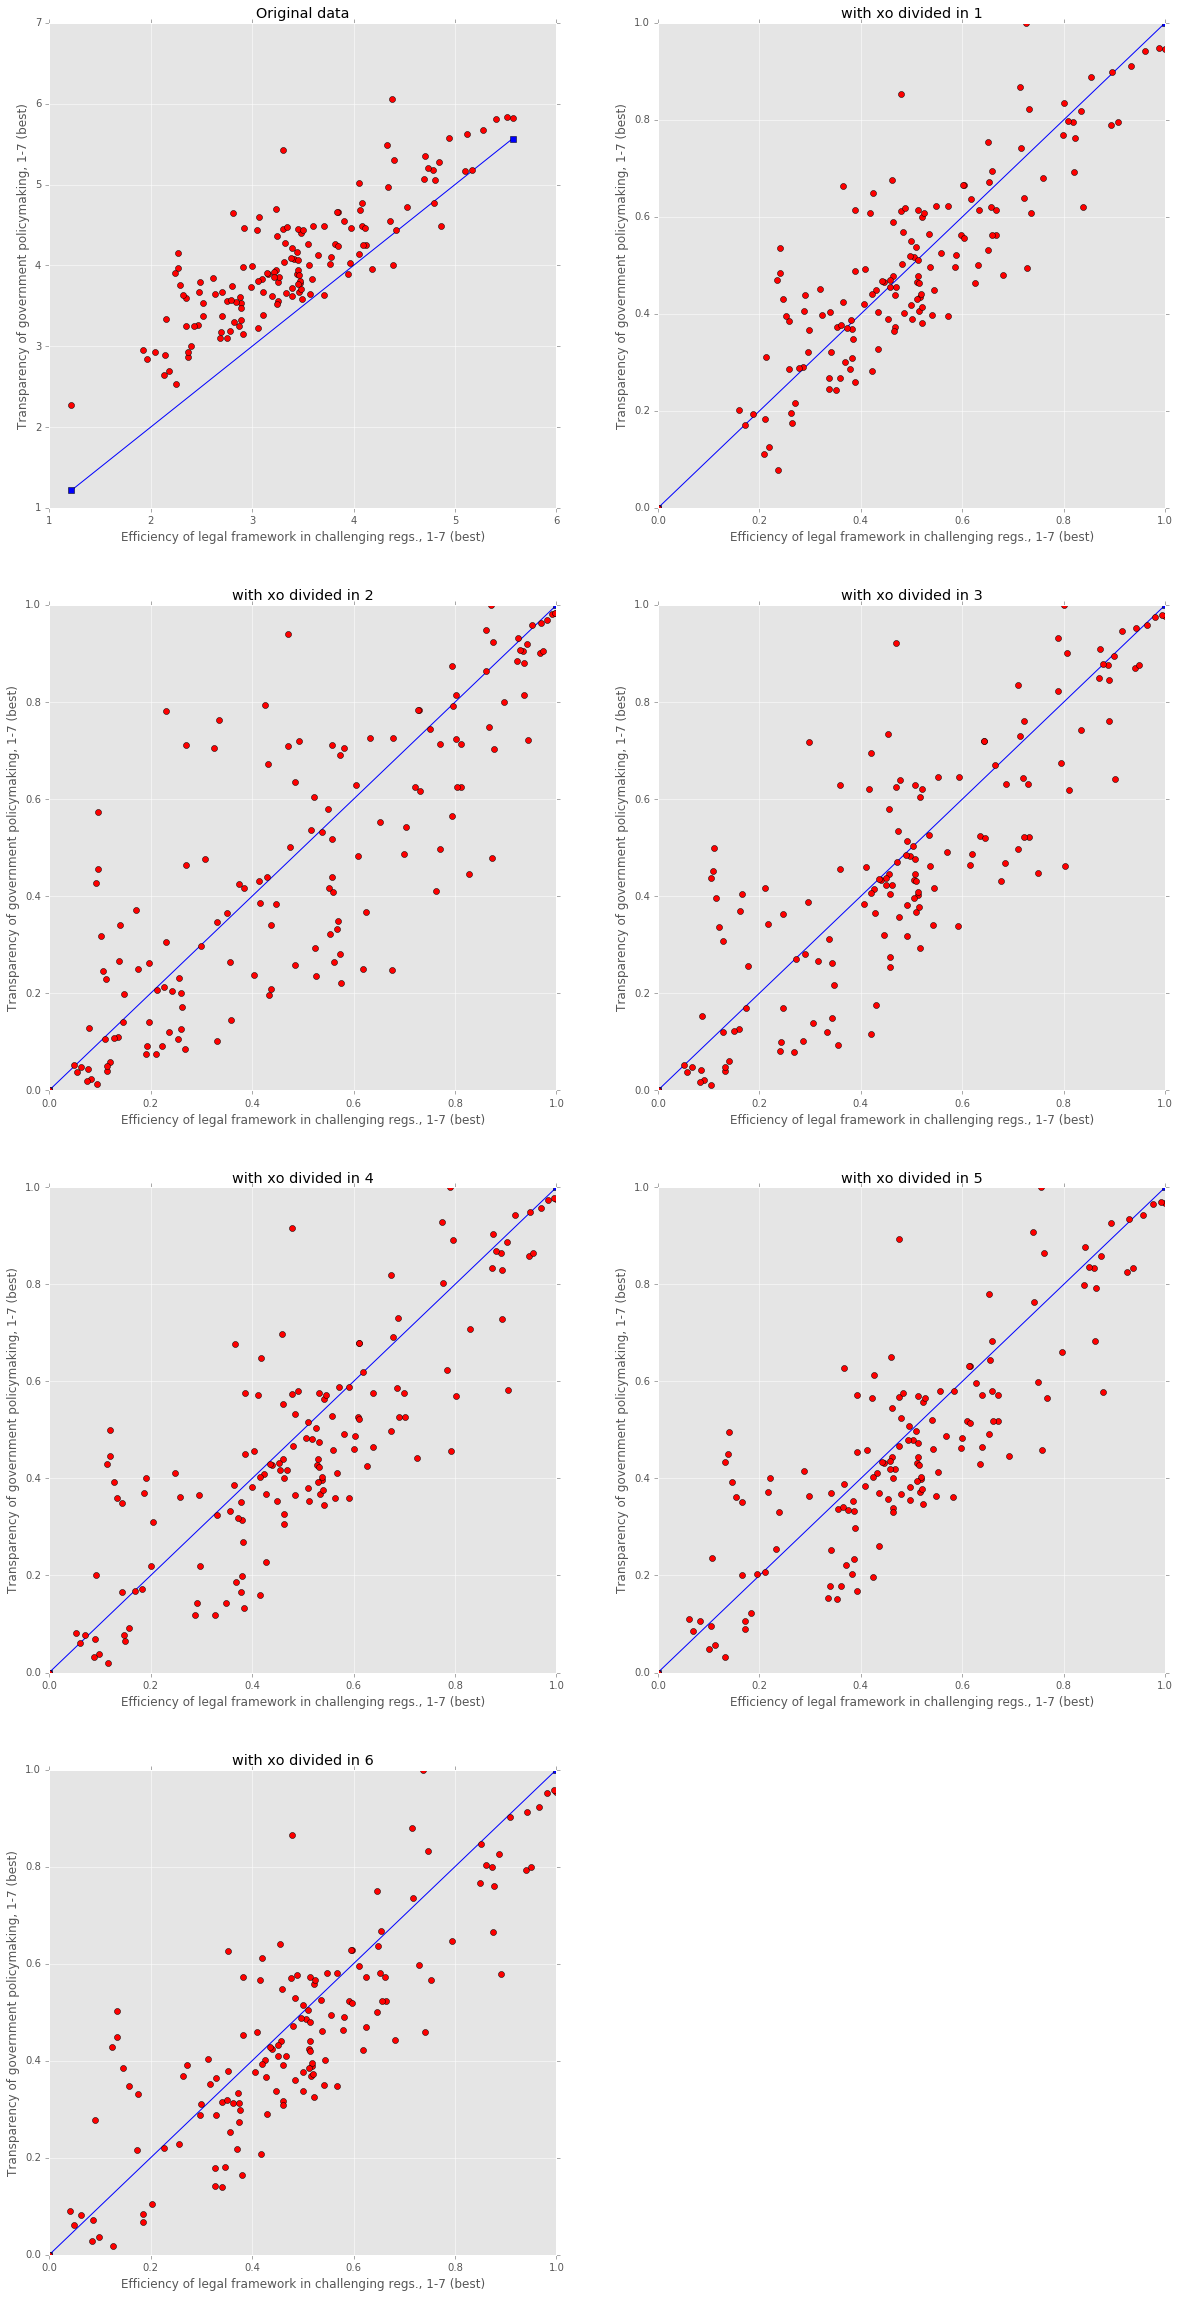

In [3]:
# extract a few transformations and store them into dfxots
fig1, dfxots = macg.plot_transformations(dfxo)
best_transformation, dfxot = macg.get_best_transformation(dfxots)

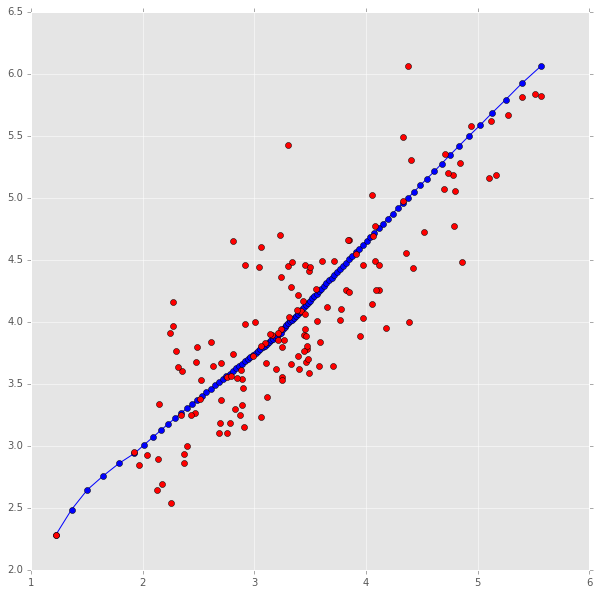

In [4]:
base_transformation = dfxots[best_transformation]
fig2 = macg.plot_interpolated_xts(base_transformation)

total number of points: 144


dfxot             1 - xt_diff / xt_sum     (xt_sum - xt_diff) / (xt_sum + xt_diff)
                  correlation              least-absolutes correlation
----------------------------------------------------------------------------------
original data     0.7227503441395586       0.5658645831872745      
xo / 1            0.725526864560309        0.5692759183268336      
xo / 2            0.7227326895041133       0.5658429395045893      
xo / 3            0.7243814199079801       0.567866783388907       
xo / 4            0.7209477075267756       0.563657726716336       
xo / 5            0.7220211659183371       0.5649711455801778      
xo / 6            0.7218851346466797       0.564804583856493       
----------------------------------------------------------------------------------
Best transformation is 1


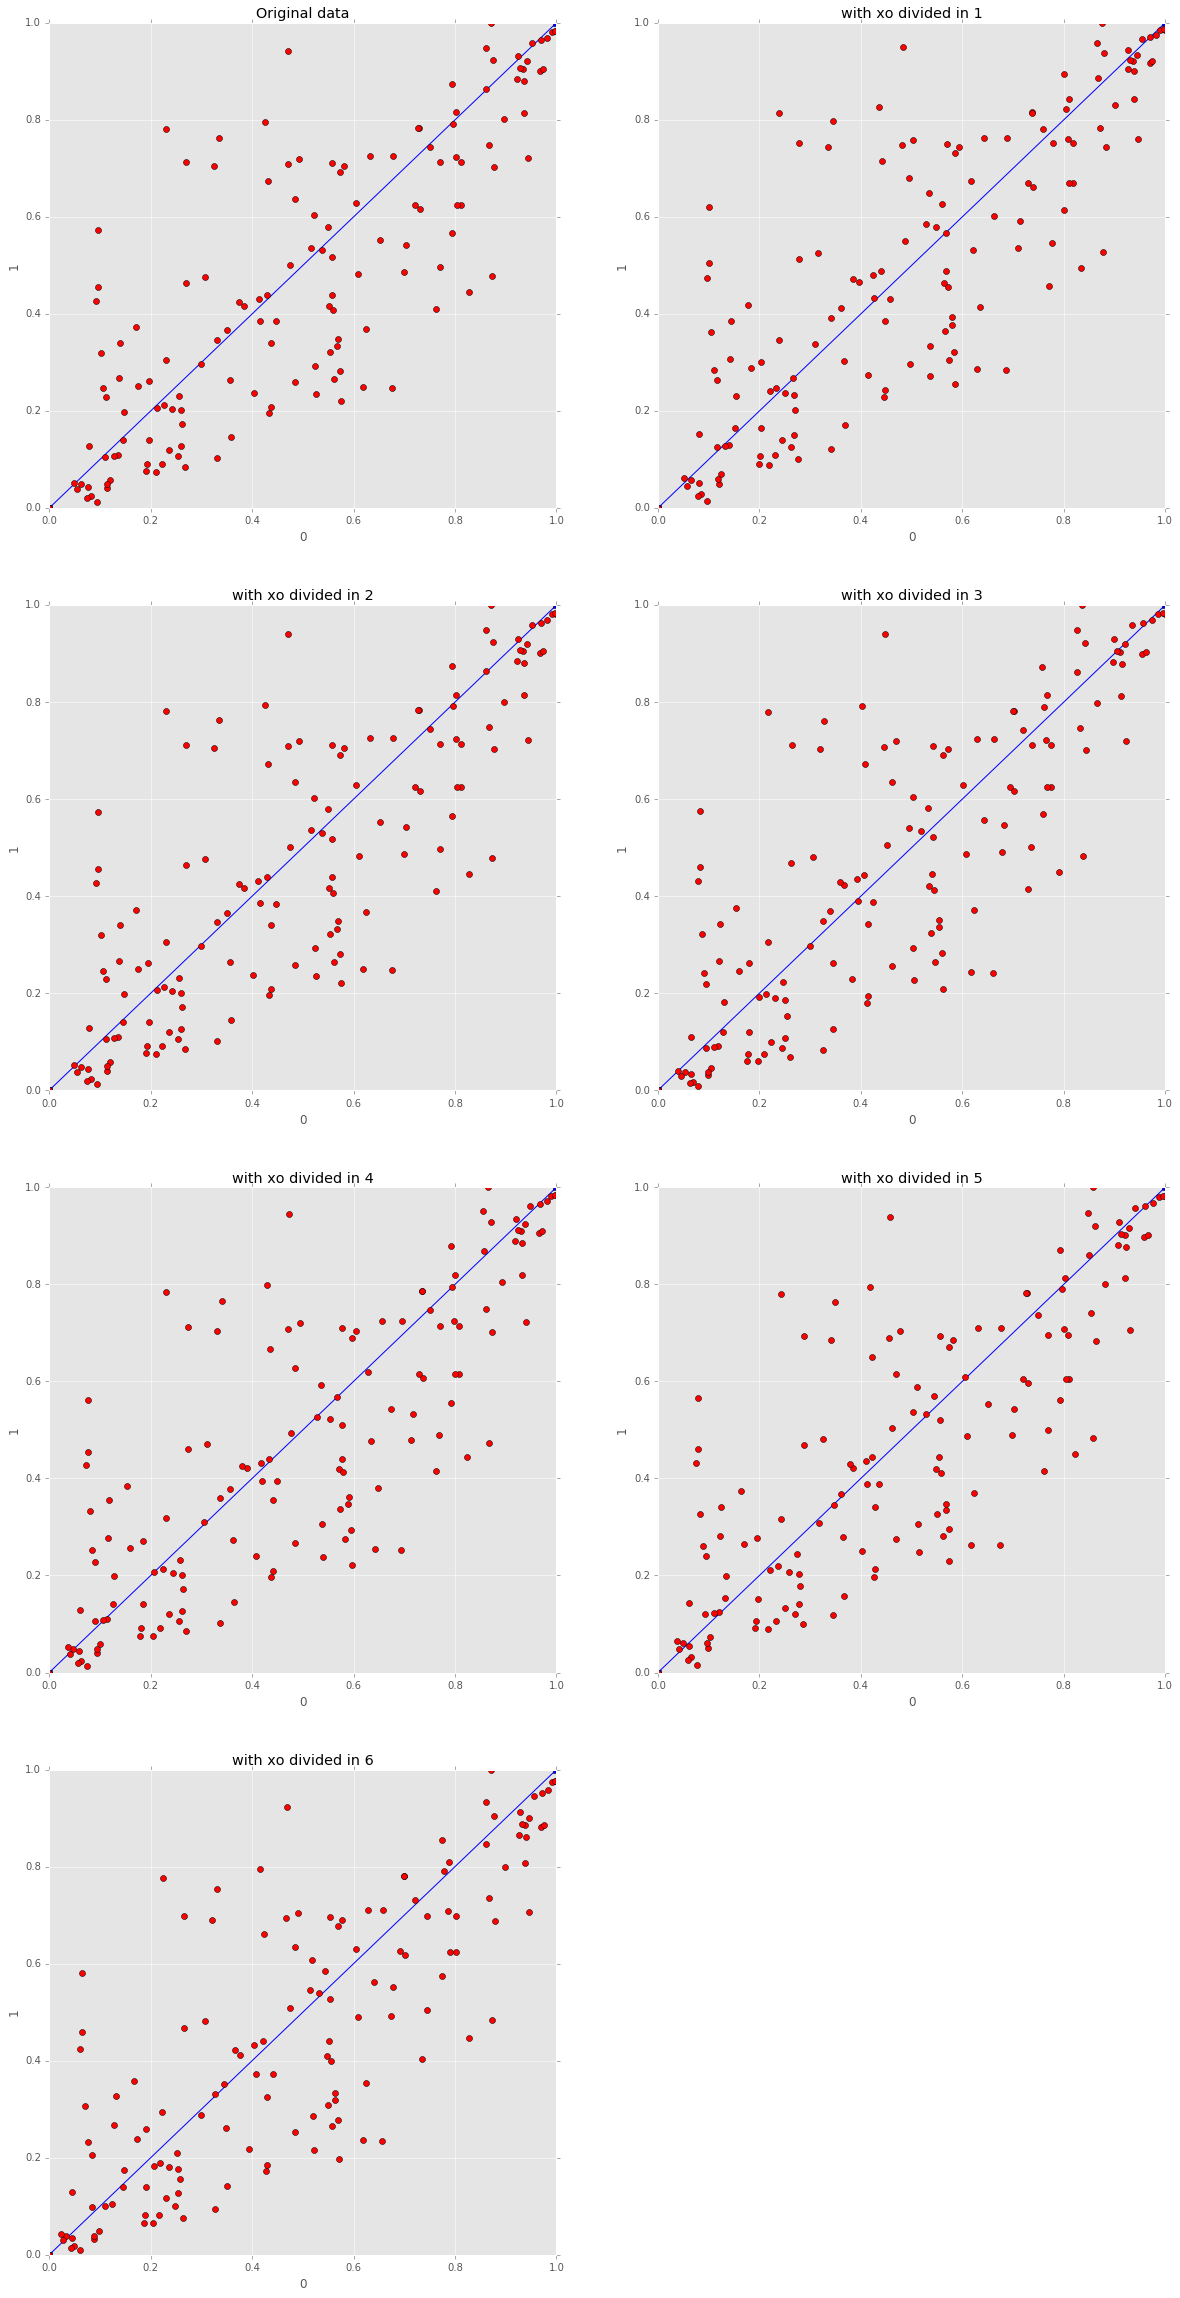

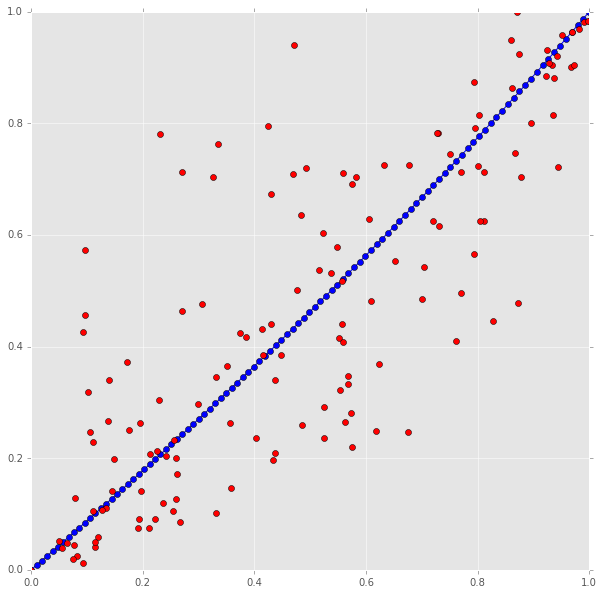

In [5]:
# compute transformations on transformed values
dfxot_as_dfxo = base_transformation[['xt_0', 'xt_1']].rename(columns = {'xt_0': 0, 'xt_1': 1})
fig3, dfxots2 = macg.plot_transformations(dfxot_as_dfxo)
best_transformation2, dfxot2 = macg.get_best_transformation(dfxots2)
fig4 = macg.plot_interpolated_xts(dfxot2)

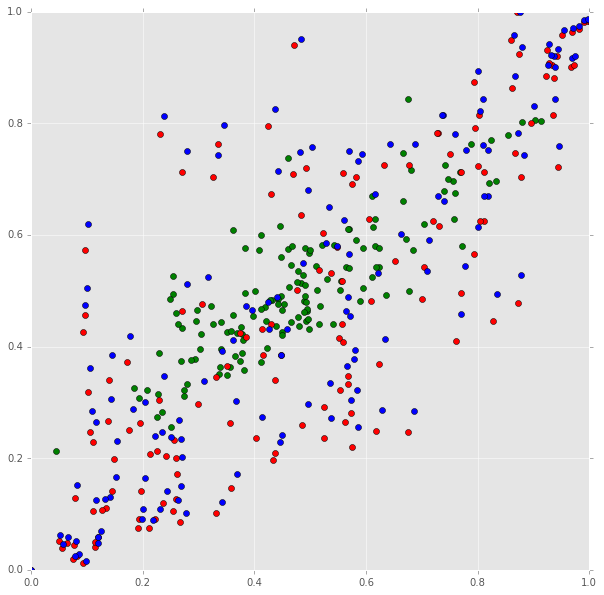

In [6]:
    fig, sp = plt.subplots(1)
    fig.set_size_inches(10, 10)
    sp.plot((dfxot[0] - 1)/5, (dfxot[1] - 1)/6, 'go')
    sp.plot(dfxot2[0], dfxot2[1], 'ro')
    sp.plot(dfxot2['xt_0'], dfxot2['xt_1'], 'bo')
